# ifm_contrib - An Introduction

*Contact: Alexander Renz - DHI Munich - are@dhigroup.com*


***ifm_ contrib*** *is an Open-Source Extension of the IFM. It is written by practical users, for practical users.
It builds on top of the Standard FEFLOW IFM API which provides the elementary functions to access the model data. It therefore does not extend the functionality of the IFM in the sense of allowing to do something that was not possible before. It rather allows the use of the current functionality in a more productive and more intuitive way, mainly by making common processes available to the Data Science tools available in the Python Ecosystem, with (Geo)-Pandas being the most important tool.*

*Development has started in September 2018 and the source code is maintained on DHI's github account. It should however be noted that at this stage DHI does not officially support this extension, which is provided "as-is" under the MIT license. There was no tracking of man-hours that went into the development, but telling by the number of uploaded code lines (60.000+) and commits (100+) on github stats, this is probably in the mid 3-digit range. At the same time, we are more than sure that productivity gain for the authors alone is going to pay back the investment.*

*By publishing the code we hope to support the FEFLOW product as such, hoping for a productivity boost for the users and providing a counterpart to the `FloPy` library, the `ifm_contrib` counterpart in the MODFLOW world. And last not least, we are looking for others to contribute to this work, inside and outside DHI to make this a real community effort.*


## FAQ

**What is ifm_contrib?**

+ **ifm_contrib** is an Open Source Extension Project for the FEFLOW Programming API Python IFM.
+ **ifm_contrib** is code-compatible with the standard IFM.
+ **ifm_contrib** adds extra API commands focussing on productivity in working with FEFLOW
+ **ifm_contrib** syntax is kept close to workflows on the GUI for intuitivity

**Installation**

+ ifm_contrib requires FEFLOW version 7.2 or higher.
+ ifm_contrib is published as a Python package for easy installation with `pip install ifm_contrib`.
+ for the lastest development version, clone the repository from github `git clone http://github.com/dhi/ifm-contrib`

**Legal**

The code is published under the MIT license. It is free to use, share and modify. It is possible to create a private fork and make proprietary modifications. Users however encouraged to contribute their own code back to the main branch, however it is not a requirement.

**Beta Status** 

The library is currently in a mature BETA-status, thus changes may be made that will not be backwards compatible, even though this become uncommon sind mid 2019.

**Current Focus of Development**

The main focus of development in 2018 through 2020 is to create an interoperability with the Python Ecosystem, namely (Geo-)Pandas and Matplotlib. Through the use of Jupyter Notebook, and can to a large degree replace the FEFLOW GUI for a number of tasks, especially during postprocessing.

**Online Help**

Its not a pretty one, but you can find an (unregularly updated) help system here:
https://dhi.github.io/ifm_contrib/ifm_contrib.contrib_lib.html 

## Highlights

*ifm_contrib* in combination with Jupyter can improve productivity by a large amount as opposed to using the GUI alone. 
A few things you can do:

**Visualize FEFLOW Results directly in Jupyter**

Create inline plots with the look-and-feel of FEFLOWs directly within Jupyter. The plots can be exported as GeoDataFrames and saved to shape-files easily. *ifm_contrib* adds light support for coordinate systems to FEFLOW.

<img src="highlights_map.png" align="left"> 

**Process FEFLOWs Time Series with Pandas**

Time Series (aka Power functiosn) and History charts can be easily exported to pandas DataFrames. Automatic conversion to DateTime based on FEFLOWs Reference Time. In-Built Synchronization to observation point reference data.

<img src="highlights_timeseries.png" align="left">


**Pandas access to Nodal and Elemntal Data, Multi-Layer Wells, and many more**

Just keep on reading...

## Namespace - Where do I find which Function?

**Standard IFM calls**

Because **ifm_contrib is code-compatible to the standard IFM**, you can import it with this alias.

It inherits all commands of the classic IFM API, thus that it is code-compatible with code written for the classic IFM 

In [1]:
# import ifm_contrib with alias ifm
import ifm_contrib as ifm

# do some regular stuff with it
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("../../unittests/models/example_2D.dac")
print("The model has {} elements.".format(doc.getNumberOfElements()))

The model has 959 elements.


**ifm_contrib calls**

However **ifm_contrib adds additional API features**. Most of these are found in a separate sub-namespace of the IfmDocument object called `doc.c.<command>`. The code below is a method to retrieve a data-frame with the head-observations of a model by calling `doc.c.hist.df.HEAD` and plotting it using the DataFraes `.plot()`-method.



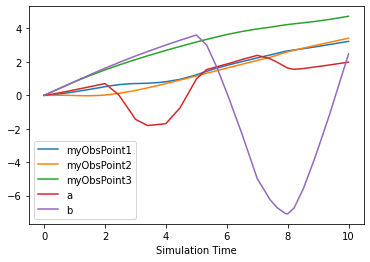

In [2]:
doc.c.hist.df.HEAD.plot()

The features are classified by their usage, following roughly the rationale as they appear in FEFLOW's GUI:

+ `doc.c.plot` : plot maps using matplotlib, similar to FEFLOWs slice view.
+ `doc.c.hist` : get history chart data
+ `doc.c.mesh` : get model data (nodal, elemental, dfe, multi-layer wells, etc.)
+ `doc.c.ts` : get time series data
+ `doc.c.obs` : get observation points data
+ `doc.c.sel` : get selection data
+ `doc.c.content` : get elemental content data

An individual introduction for each of them is provided further below.

**Methods for Vanilla Python (if using standard libraries only)**

The direct member methods of these objects return results that can be used using Python standard libraries.

For example, `doc.c.sel.getSelectionNames` returns the names of the selections stored in the model as a plain Python list:

In [3]:
doc.c.sel.getSelectionNames(seltype=ifm.Enum.SEL_ELEMS)

['upper_half', 'conversiontest_el']

**Methods for Pandas**

The recommended use of ifm_contrib is in conjunction with the well-known Python DataScience ecosystem, namely `pandas`, `geopandas` (See section *Plotting* for `matplotlib`).

In this case, ifm_cotrib common return format are pandas.DataFrame objects. The respective methods are available in the `.df` (stands for DataFrame) namespace in each component, e.g. for the case of selections `doc.c.sel.df.selections`:

In [4]:
doc.c.sel.df.selections(seltype=ifm.Enum.SEL_ELEMS)

,SEL_TYPE,SEL_ENUM,SEL_ID,N_ITEMS
selection_name,,,,
upper_half,elements,1,0,420
conversiontest_el,elements,1,1,2


Note that ifm_contrib adds additional information, like in this case the number of elements, for easier access to information.

**Method for GeoPandas**

For methods returning geographic information, there is also a `.gdf` namespace that returns the desired information as a GeoDataFrame that contains the geometry of a feature to allow plotting and spatial operation.

For example, observation points `doc.c.obs.gdf.obspoints` method returns a GeoDataFrame that can be used like a regular Dataframe,

In [5]:
doc.c.obs.gdf.obspoints()

,label,x,y,z,node,h,conc,shape
id,,,,,,,,
0,myObsPoint1,422.358098,833.017547,0.0,NaN,3.228757,NaN,POINT (422.358 833.018)
1,myObsPoint2,578.870531,561.335589,0.0,NaN,3.417063,NaN,POINT (578.871 561.336)
2,myObsPoint3,192.019047,463.884452,0.0,NaN,4.731053,NaN,POINT (192.019 463.884)


... but can also be shown in a Jupyter Notebook as a geometrical shape:

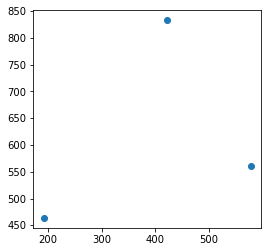

In [6]:
doc.c.obs.gdf.obspoints().plot()

## Features 

In the following, the most important features are explained. We will discuss the main objects one-by-one.
Note that its quite rare that the author typing this line has the time to update this document, so always assume that this not even more features may be implemented by the time you read this.

### Access Model Properties

One of the most commonly used features of ifm_contrib is to query data that is related to mesh items and basically everything that you would see in the *Data Panel* of the GIU.

These methods can be found below

+ `doc.c.mesh`
+ `doc.c.mesh.df`
+ `doc.c.mesh.gdf`

Note: Most of the time you want to use *(geo)pandas-use* features only here you can query more than just the basic information. Be careful with the corresponding *geopandas* options, computation is significant if querying large tables like nodes or elements.

Items you can query for are:

+ `doc.c.df.nodes` / `doc.c.df.elements`: nodal and elemental data, probably the most used functions
+ `doc.c.df.elements` / `doc.c.df.faces`: data related to faces and elements (not much there, though)
+ `doc.c.df.dfe` Properties of Discrete Feature Elements
+ `doc.c.df.mlw` Properties of Multi-Layer Wells

#### Nodal and Elemental Data

`doc.c.mesh.df.nodes()` and `doc.c.mesh.df.elements()` returns a DataFrame with basic information on these properties if called without any parameters (showing first 3 lines). Note that coordinates are provided in global coordinates unless `global_cos=False` is set.

In [7]:
df_nodes = doc.c.mesh.df.nodes()
df_nodes.head(n=3)

,SLICE,TOP_NODE,X,Y
NODE,,,,
0,None,None,165.454856,1029.189591
1,None,None,136.731283,1003.845262
2,None,None,108.007710,978.500933


To query more usefull data from the model, we want to add further columns to this table with the corresponding nodal data. 

**Model Properties**

The below example adds a colum with the nodal hydraulic head value to the DataFrame by calling the parameter `par=`. The parameter is one of the constants defined in the `ifm.Enum` object, in which parameters are marked with a leading `P_` (e.g., `ifm.Enum.P_HEAD` denotes the hydraulic head).

In [8]:
df_nodes= doc.c.mesh.df.nodes(par=ifm.Enum.P_HEAD)
df_nodes.head(n=3)

,SLICE,TOP_NODE,X,Y,400
NODE,,,,,
0,None,None,165.454856,1029.189591,0.0
1,None,None,136.731283,1003.845262,NaN
2,None,None,108.007710,978.500933,NaN


As this is not very readable, it is usually better to provide human-friendly column names when calling the method:

In [9]:
df_nodes= doc.c.mesh.df.nodes(par={"HEAD": ifm.Enum.P_HEAD})
df_nodes.head(n=3)

,SLICE,TOP_NODE,X,Y,HEAD
NODE,,,,,
0,None,None,165.454856,1029.189591,0.0
1,None,None,136.731283,1003.845262,NaN
2,None,None,108.007710,978.500933,NaN


This also allows you query more than one parameter:

In [10]:
df_elements= doc.c.mesh.df.elements(par={"Transmissivity": ifm.Enum.P_TRANS,
                                        "Matrix Compressibility" : ifm.Enum.P_COMP})
df_elements.head(n=3)

,LAYER,TOP_ELEMENT,Transmissivity,Matrix Compressibility
ELEMENT,,,,
0,None,None,1.0,0.0001
1,None,None,1.0,0.0001
2,None,None,1.0,0.0001


**User Distributions and Expressions** 

In a very similar way, User distributions and Expressions can be queried using the `distr=` and `expr=` parmeters, respectively. Isage is non-exclusive with other queries. The parameter expected is the name of distribution/expression, either as a string or a list of strings if multiple queries are required. Note that dict-style renaming is not implemented yet.

In [11]:
# Have a quick look at the available user distributions in the model:
doc.c.user.df.info()

,ID,Name,user_type,item_type
0,0,elemental_test,DISTRIBUTION,ELEMENTAL
0,0,nodal_test,DISTRIBUTION,NODAL
0,0,elemental_expr_test,EXPRESSION,ELEMENTAL
0,0,nodal_expr_test,EXPRESSION,NODAL


In [12]:
df_nodes = doc.c.mesh.df.nodes(par={"HEAD" : ifm.Enum.P_HEAD}, distr="nodal_test", expr=["nodal_expr_test"])
df_nodes.head(n=3)

,SLICE,TOP_NODE,X,Y,HEAD,nodal_expr_test,nodal_test
NODE,,,,,,,
0,None,None,165.454856,1029.189591,0.0,1.0,1.0
1,None,None,136.731283,1003.845262,NaN,1.0,1.0
2,None,None,108.007710,978.500933,NaN,1.0,1.0


**velocity, budget, content, centroids**

These methods are also used for computational results that deliver nodal or elemental results, respectively.

Additional possible queries are:
+ `doc.c.mesh.df.elements(content=Ture)`: Add elemental content components
+ `doc.c.mesh.df.elements(centroids=True)`: Add centroid coordinates
+ `doc.c.mesh.df.nodes(budget=True)`: Add nodal budget components
+ `doc.c.mesh.df.nodes(content=True)`: Add nodal velocity components


**Filtering by Selection or Layer/Slice, and using GeoPandas**

It is possible to filter the output by a certain selection

In [13]:
doc.c.mesh.df.nodes(selection="abstraction_rate")

,SLICE,TOP_NODE,X,Y
NODE,,,,
570,None,None,254.321772,533.356754
430,None,None,380.547981,757.171943


or by a slice number (`doc.c.mesh.df.nodes(slice=1)` or, respectivel, layer number `doc.c.mesh.df.elements(layer=1)`.

### Selections (Items Sets)

The methods of the `doc.c.sel` object are facilitating the usage of selections and its items.

As opposed to the corresponding functions in standard ifm, selections are called by their given name directly, thus that it is not necessary to make seperate queries for the user distribution id.

**Get list of selections**

Lets start by checking which selections are in the model. `doc.c.sel.selections()` returns a list.

In [14]:
doc.c.sel.selections()

['west', 'east', 'abstraction_rate', 'upper_half', 'conversiontest_el']

it may be more useful to call the corresponding pandas method, which provides more information:

In [15]:
doc.c.sel.df.selections()

,SEL_TYPE,SEL_ENUM,SEL_ID,N_ITEMS
selection_name,,,,
west,nodes,0,0,20.0
east,nodes,0,1,12.0
abstraction_rate,nodes,0,2,2.0
upper_half,elements,1,0,420.0
conversiontest_el,elements,1,1,2.0


**Get item numbers of selections**

Using the selection name, we can now query the items using `doc.c.sel.list()` (returns a Python list) or `doc.c.sel.set()` (returns a Python set).

In [16]:
doc.c.sel.list("west")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

lists are particularly useful to run queries on pandas dataframes:

The following example uses `doc.c.mesh.df.elements` to query an element list including the elemental Tranmissivity values, and then uses `doc.c.sel.list` to query only those elements in the "upper_half" selection. 
We finally plot a histogram of the values queried this way:

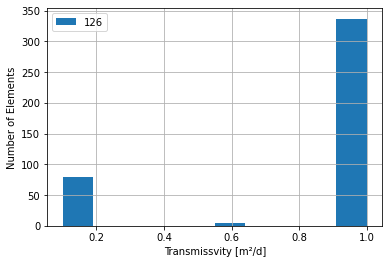

In [17]:
df_elements = doc.c.mesh.df.elements(par=ifm.Enum.P_TRANS).loc[doc.c.sel.list("upper_half")]
df_elements.plot.hist(label="Transmissivity")

# OK, let's load the matplotlib to make this figure pretty ...
import matplotlib.pyplot as plt
#matplotlib inline
plt.xlabel(u"Transmissvity [m²/d]")
plt.ylabel(u"Number of Elements")
plt.grid()

The next examples illustrates how this enables to do calculation with very concise syntax.
The line below calculates the water balance for the western border of the model (nodes in selection "west"):

In [18]:
doc.c.mesh.df.nodes(budget=True).loc[doc.c.sel.list("west")].budget_flow_bc.sum()

-12.45188231530436

**Create, clear, update and convert selections**

The following functions can replace their standard ifm correspondants, as they allow to work with selection names and item lists more conveniently, they also resemble the context menu options of the Selection Panel of the GUI:

+ `doc.c.sel.create` create a selection from a list of elements
+ `doc.c.sel.clear` clear the selection
+ `doc.c.sel.convert` convert the selection to a different type
+ `doc.c.sel.update` set the givn list of items as the new selection

The below example creates a new elemental selection with all elements:

In [19]:

doc.c.sel.create(ifm.Enum.SEL_ELEMENTAL, "All_Elements", 
                 itemlist=range(doc.getNumberOfElements()),
                 overwrite_existing=True)
doc.c.sel.df.selections()

,SEL_TYPE,SEL_ENUM,SEL_ID,N_ITEMS
selection_name,,,,
west,nodes,0,0,20.0
east,nodes,0,1,12.0
abstraction_rate,nodes,0,2,2.0
upper_half,elements,1,0,420.0
conversiontest_el,elements,1,1,2.0
All_Elements,elements,1,2,959.0


**intersect, add, subtract selections**

Set operations as they appear in the GUI are not explicitely implemented (feel free to do so!). Instead, we can use the `doc.c.sel.set` command to retrieve the item numbers as a Python set, which allows to easily perform set operations:

In [20]:
# intersection
len(doc.c.sel.set("upper_half") & doc.c.sel.set("All_Elements"))

420

In [21]:
# union
len(doc.c.sel.set("upper_half") | doc.c.sel.set("All_Elements"))

959

### Time Series (Output / Histories)

Probably one of the most important results from FEFLOW are the history charts, with continuous results on observation points, budgets, etc. This is probably the most heavily used feature when you are using ifm_contrib for postprocessing.

**Basic Usage**

As time series are best processed using pandas, ifm_contrib provides fast access to all histories in DataFrame through a single method `doc.c.hist.df.history()`. The following example returns a DataFrame of the hydraulic head at the observations points (last 3 entries shown):

In [22]:
df_head = doc.c.hist.df.history(ifm.Enum.HIST_HEAD)
df_head.tail(n=3)

,myObsPoint1,myObsPoint2,myObsPoint3,a,b
Simulation Time,,,,,
9.353301,3.032246,3.161879,4.534319,1.811008,-1.280323
9.977686,3.222012,3.408310,4.723575,1.979116,2.341641
10.000000,3.228757,3.417063,4.731052,1.985449,2.475872


Because this is such a common operation, ifm_contrib also allows a short syntax for this kind of call (however it does not allow any customization shown further below):

In [23]:
df_head = doc.c.hist.df.HEAD
df_head.tail(n=3)

,myObsPoint1,myObsPoint2,myObsPoint3,a,b
Simulation Time,,,,,
9.353301,3.032246,3.161879,4.534319,1.811008,-1.280323
9.977686,3.222012,3.408310,4.723575,1.979116,2.341641
10.000000,3.228757,3.417063,4.731052,1.985449,2.475872


**Simulation Time and Calendar Date**

The index of the DataFrame being returned can either be of float type (relate to the simulation time in days - *time axis*) or of datetime type (calendar date - *calendar axis*).

Unless you force a time axis (`doc.c.hist.df.history(ifm.Enum.HIST_HEAD, force_time_axis=True)`), ifm_contrib will return a calendar axis if a reference time is set in FEFLOW (can be set in Problem Settings in the GUI, or through the IFM):

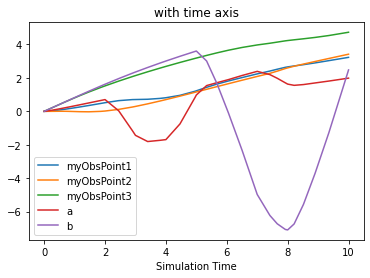

In [24]:
# do the query (no reference date is set in the model at this point)
df_time_axis = doc.c.hist.df.history(ifm.Enum.HIST_HEAD)
df_time_axis.plot(title="with time axis")

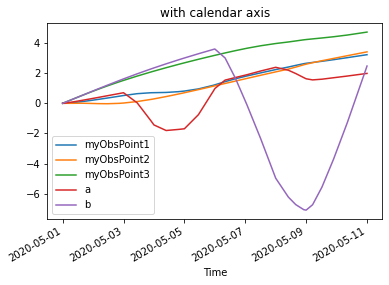

In [25]:
# set the reference date
from datetime import datetime
doc.setReferenceTime(datetime(2020, 5, 1))

# repeat the query
df_calendar_axis = doc.c.hist.df.history(ifm.Enum.HIST_HEAD)
df_calendar_axis.plot(title="with calendar axis")

**Sync to a different index**

When comparing observation data with simulation results, it is a common necessesity to be able to map the model results onto the observation time index. For convenience, ifm_contrib has an in-built feature for this:

In [26]:
# create a DateTime index with daily time steps
import pandas as pd
observation_index = pd.date_range(datetime(2020, 5, 1), datetime(2020,5,10), freq="D")
observation_index

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10'],
              dtype='datetime64[ns]', freq='D')

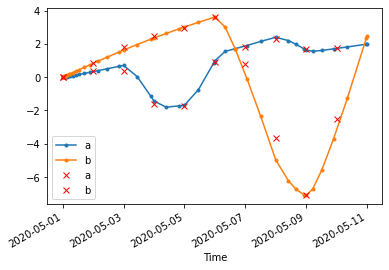

In [27]:
# then we inject this in
df_observation_axis = doc.c.hist.df.history(ifm.Enum.HIST_HEAD, sync_to_index=observation_index)

# plot the curves side by side
ax1 = df_calendar_axis[["a", "b"]].plot(style=".-")
df_observation_axis[["a", "b"]].plot(ax=ax1, style="x", color="red")


**Note**: if you find a bug in the code, please put in a ticket on https://github.com/dhi/ifm_contrib/issues. Thank you.

### Time Series (Input / Power Functions)

The main difference between History charts and Time Series (aka power Functions) is that the former ones are synchronous (sharing the same time axis which are the time steps of the simulation run), while the latter one have individual time indices. This is why Time Series and histories are handled somewhat differently.

**List of Time Series**

ifm_contrib provides a few business functions mainly for convenience. The most important is `doc.c.ts.df.info()` which returns a DataFrame with information of the models time series. (`doc.c.ts.info()` is the equivalent function for vanilla python):

In [28]:
doc.c.ts.df.info()

,comment,no_point,interpolation_kind,is_cyclic
tsid,,,,
10,weel_A,8,2,False
11,well B,8,2,False
20,gap_example,5,2,False


**Content of Time Series**

To retrieve the time series itself, use the `doc.c.ts.df.points` method. You can choose the time series by its unique ID or by its comment.

**Note 1:** A gap in the time series is denothed by a `NaN` value.

**Note 2:** With regard to a time axis or calendar axis, `doc.c.ts.df.points` behaves equivalent to `doc.c.hist.df.history`

**WARNING:** If calling by the comment, make sure that this is a unique identifier. ifm_contrib with rise a `RunTimeError` otherwise.




In [29]:
doc.c.ts.df.points("gap_example")

,Values
Simulation Time,
2020-05-01 00:00:00,0.0
2020-05-02 00:00:00,1.0
2020-05-03 00:00:00,2.0
2020-05-03 12:00:00,NaN
2020-05-04 00:00:00,3.0


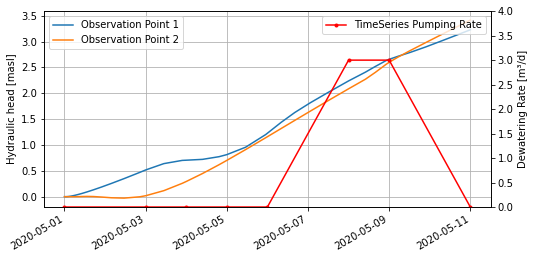

In [30]:
fig, ax1 = plt.subplots(1, figsize=(8,4))


doc.c.hist.df.HEAD.myObsPoint1.plot(ax=ax1, label="Observation Point 1")
doc.c.hist.df.HEAD.myObsPoint2.plot(ax=ax1, label="Observation Point 2")

ax1b = ax1.twinx()
doc.c.ts.df.points("well B").Values.plot(style=".-", ax=ax1b, label="TimeSeries Pumping Rate", color="red")
ax1.grid()
ax1.legend()
ax1b.legend(loc="upper right")

ax1.set_xlabel("")
ax1.set_ylabel("Hydraulic head [masl]")
ax1b.set_ylabel(u"Dewatering Rate [m³/d]")

ax1b.set_ylim(0, 4)

plt.savefig("highlight_timeseries.png")



In [31]:
doc.c.ts.df.points("well B")

,Values
Simulation Time,
2020-05-01,0.0
2020-05-03,0.0
2020-05-04,0.0
2020-05-05,0.0
2020-05-06,0.0
2020-05-08,3.0
2020-05-09,3.0
2020-05-11,0.0


### Observations

**Getting a list of observations points**

`doc.c.obs.gdf.obspoints` returns the list of obs points as a GeoDataFrame (There is no implementation for Pandas yet - work in progress).

In [32]:
doc.c.obs.gdf.obspoints(

,label,x,y,z,node,h,conc,shape
id,,,,,,,,
0,myObsPoint1,422.358098,833.017547,0.0,NaN,3.228757,NaN,POINT (422.358 833.018)
1,myObsPoint2,578.870531,561.335589,0.0,NaN,3.417063,NaN,POINT (578.871 561.336)
2,myObsPoint3,192.019047,463.884452,0.0,NaN,4.731053,NaN,POINT (192.019 463.884)


### Plotting

While the GUI can render excellent figures from its various views, there is no documented automation option to export figures e.g. in a batch process. Also - in particular when working with Jupyter Notebooks, an in-line visualization is a very usefull feature to visualize results.

A plotting feature has therefore been implemented in *ifm_contrib* that generates matplotlib figure for inline visualization or file output. 

The implementation roughly follows the rationale of the *View Components* panel, where different styles are put on top of each other. ifm_contrib also implements all of FEFLOWs defaults color schemes and makes them available in the matplotlib upon import.

An example is shown below:

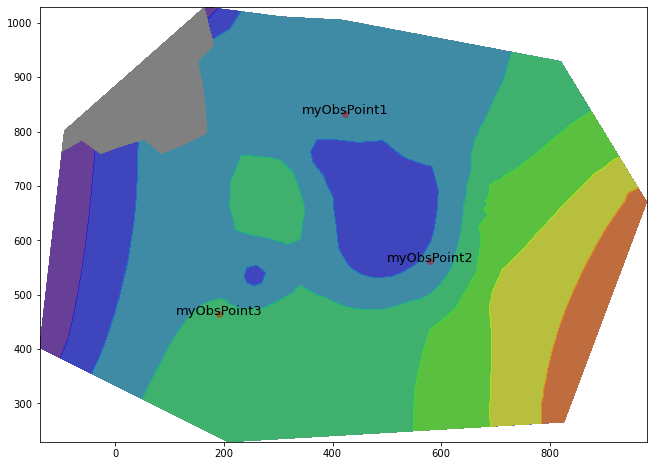

In [33]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, figsize = (12, 8))

doc.c.plot.faces()
doc.c.plot.obs_labels(size=13)
doc.c.plot.obs_markers(color="red", alpha=1.)
doc.c.plot.fringes(par=ifm.Enum.P_HEAD)

currently, the following styles are implemented:

**Geometry**
+ `doc.c.plot.faces`
+ `doc.c.plot.edges`

**Plotting model properties**

The following styles are adopted to plot distributed data:

+ `doc.c.plot.continuous`
+ `doc.c.plot.fringes`
+ `doc.c.plot.isolines`
+ `doc.c.plot.patches`

the following attributes are supported:

+ `par`, `expr`, `distr`, `velocity`: choose the property to be plotted. The syntax is identical to the `doc.c.mesh.df.nodes` / `doc.c.mesh.df.elements` functions.
+ `slice` / `layer`: select the slice or layer number
+ `global_cos=True` : set to `False` to plot in local coordinates
+ `species`: select the species to be plotted
+ **any other keyword argument will be forwarded to the underlying matplotlib.pyplot.plot() function.** See the matplotlib documentation for further information.
  + one of the most important arguments for isolines and fringes is the argument `levels`, that lets you choose the isoline / fringes corresponding to the Iso-Tab in the GUI.


**Observation Points**
+ `doc.c.plot.obs_labels`
+ `doc.c.plot.obs_markers`


**FEFLOW Color Scales**

To achieve a FEFLOW GUI look-and-feel, *ifm_contrib* adds the Standard FEFLOW color schemes to the matplotlib pallet. The following command shows all available colorscales that *ifm_contrib* registers:

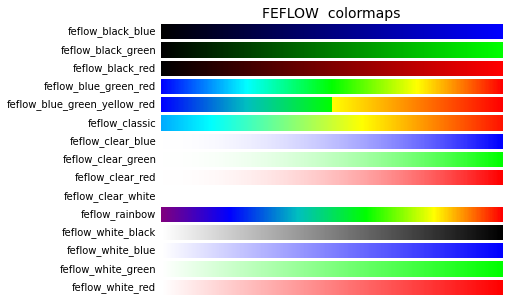

In [34]:
ifm.colormaps.plot_feflow_colorgradients()

Because the plotting methods forward any keywords to the plotting functions of the matplotlib, the `cmap` attribute can be used for using a different color scale.

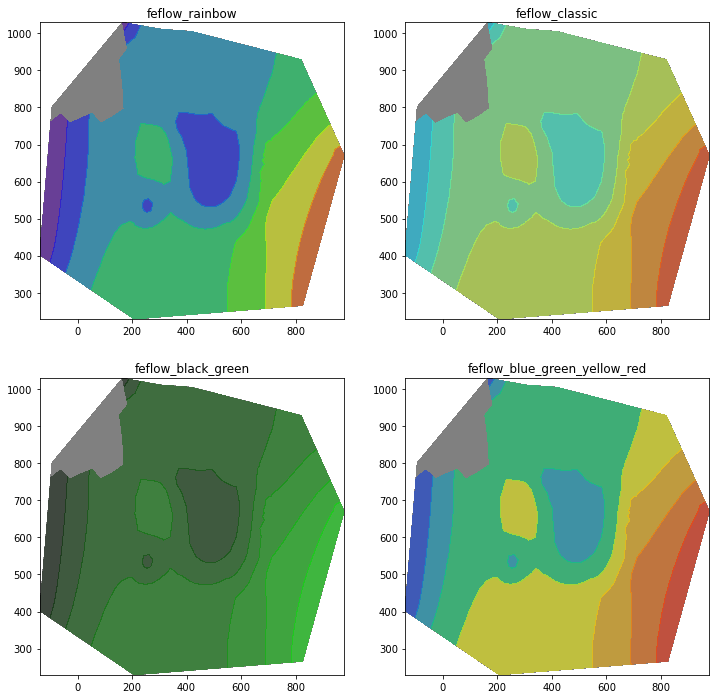

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 12))
for ax, cmap in [(ax1, "feflow_rainbow"),
                 (ax2, "feflow_classic"),
                 (ax3, "feflow_black_green"),
                 (ax4, "feflow_blue_green_yellow_red")]:
    plt.sca(ax)
    doc.c.plot.faces()
    doc.c.plot.fringes(par=ifm.Enum.P_HEAD, cmap=cmap)
    plt.title(cmap)

# Exporting Plots to Shapefiles

Isolines and Fringes can be exported to shapefile. This is done by calling the functions

+ `doc.c.plot.gdf.fringes()`
+ `doc.c.plot.gdf.isolines()`

These functions return a GeoDataFrame, that can then be exported to a shape file easily.

In [36]:
gdf = doc.c.plot.gdf.isolines(par=ifm.Enum.P_HEAD, levels=[1,3,5,7,9])
gdf.to_file("isolines.shp")
gdf

,geometry,400
0,"LINESTRING (180.701 1027.201, 169.097 1014.511)",1.0
1,"LINESTRING (-58.634 779.823, -60.908 741.137, ...",1.0
2,"LINESTRING (231.038 1020.635, 211.063 989.218,...",3.0
3,"LINESTRING (43.232 780.665, 40.236 747.436, 41...",3.0
4,"LINESTRING (405.645 785.955, 407.134 784.779, ...",3.0
5,"LINESTRING (261.322 553.996, 276.763 539.511, ...",3.0
6,"LINESTRING (804.827 931.574, 798.467 923.588, ...",5.0
7,"LINESTRING (319.353 682.232, 319.158 682.827, ...",5.0
8,"LINESTRING (911.628 777.969, 905.279 774.341, ...",7.0
9,"LINESTRING (962.069 695.516, 943.014 686.226, ...",9.0


**Coordinate Systems**

Because FEFLOW models are CRS-naive at this time of writing, geodataframes are by default not georefernenced (and if being saved to a shp-file, no .prj file is written.

If assigning the `doc.c.crs` parameter (`None` by default), *ifm_contrib* functions will become CRS-aware and any GeoDataFrames it does export will have a projection to it. Note that this will not be saved with the FEFLOW model, thus it needs to be reassigned everytime after loading the model in ifm_contrib.

The CRS must be given as a `pyproj.crs.crs.CRS` object, which can be easily retrieved from an existing shp-file that is CRS-aware:

In [37]:
# load an existing file with georeference
import geopandas as gpd
gdf_file = gpd.read_file("./sample-shape.shp")

# assign to ifm_contrib
doc.c.crs = gdf_file.crs
doc.c.crs

<Projected CRS: PROJCS["DHDN_3_degree_Gauss_Kruger_zone_4",GEOGCS[ ...>
Name: DHDN_3_degree_Gauss_Kruger_zone_4
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Deutsches Hauptdreiecksnetz
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich